In [8]:
# Dependencies
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Name of the CSV file
data = 'final_sales_data.csv'

In [10]:
#Put into data frame
data_df = pd.read_csv(data)

In [11]:
data_df.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.5,138.6
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.6,138.4
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.3,138.3
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.3,138.4
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.7,138.8


The lower quartile of unemployment rate is: 4.6
The upper quartile of unemployment rate is: 7.8
The interquartile range of unemployment rate is: 3.2
The median of unemployment rate is: 5.4 
The mean of unemployment rate is: 6.1719387755102035 
Values below -0.20000000000000107 could be outliers.
Values above 12.600000000000001 could be outliers.


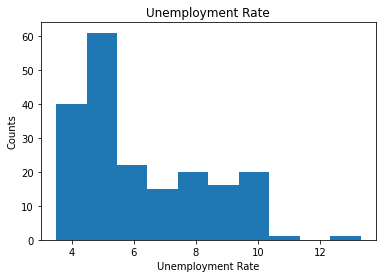

In [12]:
# Create empty list to fill 

unemploy = data_df["Unemployment_Rate"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = unemploy.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
mean=data_df['Unemployment_Rate'].mean()

print(f"The lower quartile of unemployment rate is: {lowerq}")
print(f"The upper quartile of unemployment rate is: {upperq}")
print(f"The interquartile range of unemployment rate is: {iqr}")
print(f"The median of unemployment rate is: {quartiles[0.5]} ")
print(f"The mean of unemployment rate is: {mean} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
plt.hist(data_df['Unemployment_Rate'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Counts')
plt.title('Unemployment Rate')
plt.savefig('Images/Unemployment Histogram.png', dpi=100)
plt.show()

In [13]:
unemploy = data_df["Unemployment_Rate"].tolist()

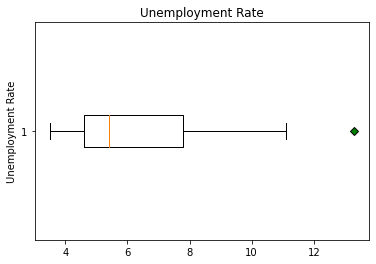

In [14]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Unemployment Rate')
ax1.set_ylabel('Unemployment Rate')
ax1.boxplot(unemploy, vert=False, flierprops=green_diamond)
plt.show()

In [15]:
# Determine outliers using upper and lower bounds
quartiles1 = data_df['Unemployment_Rate'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
unemploy_outliers=data_df[(data_df["Unemployment_Rate"]< lower_bound1) |
                                (data_df["Unemployment_Rate"]> upper_bound1)]
unemploy_outliers

-0.20000000000000107 - 12.600000000000001


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
182,May-2020,2020,1181756.0,1.87,13.3,203.5,146.785,137.592


In [16]:
unemploy_wo_liers=data_df[(data_df["Unemployment_Rate"]>= lower_bound1) &
                                (data_df["Unemployment_Rate"]<=upper_bound1)]
unemploy_wo_liers

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.500,138.600
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.600,138.400
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.300,138.300
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.300,138.400
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.700,138.800
...,...,...,...,...,...,...,...,...
191,Feb-2021,2021,1256529.0,2.501,6.2,260.5,148.587,150.370
192,Mar-2021,2021,1536038.0,2.810,6.0,289.6,148.550,151.197
193,Apr-2021,2021,1493938.0,2.858,6.1,322.8,149.267,166.374
194,May-2021,2021,1502642.0,2.985,5.8,331.3,151.693,178.505


In [17]:
unemploy_wo_liers.describe()

,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
count,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2012.687179,1.281528e+06,2.786062,6.135385,216.825641,142.683492,142.562092
std,4.759103,2.353927e+05,0.557855,1.993812,31.176061,5.062355,8.618892
min,2005.000000,6.506080e+05,1.687000,3.500000,160.000000,132.069000,121.887000
25%,2009.000000,1.140029e+06,2.311000,4.600000,194.950000,137.700000,138.095500
50%,2013.000000,1.321156e+06,2.717000,5.400000,213.900000,145.378000,140.800000
75%,2017.000000,1.471784e+06,3.227000,7.800000,233.600000,146.876000,148.827000
max,2021.000000,1.795944e+06,4.062000,11.100000,352.500000,154.680000,197.227000


In [18]:
unemploy_wo_liers.to_csv("final_unemploy_data.csv",encoding="utf-8", index=False, header=True)